## Data
The data series I estimate to.

#### Config

In [3]:
from pandas_datareader.fred import FredReader
from scipy.signal import detrend
import matplotlib.pyplot as plt
import numpy as np

#### Pull Data
Get data from 1966 to 2019 on different economic indicators.

<Axes: xlabel='t'>

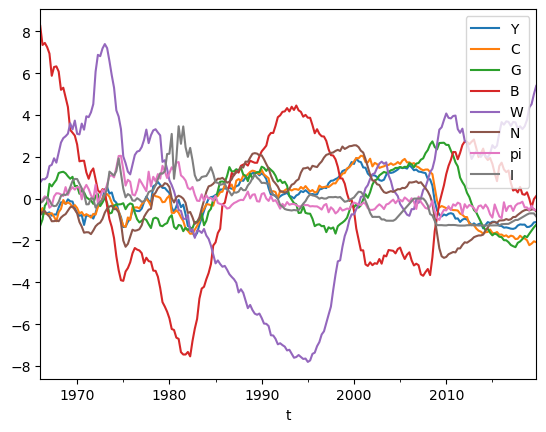

In [4]:
## config 
start = '1966-01'
end = '2019-12'
series = {
        'GDPDEF': 'gdpdef',  # gdp deflator
        'POPTHM': 'pop',  # population
        'GDP': 'Y',  # gdp
        'PCE': 'C',  # consumption
        'GCE': 'G',  # govt spending
        'GFDEBTN': 'B',  # debt
        'HOANBS': 'N',  # all nonfarm hours worked
        "FEDFUNDS": "I",  # fed funds rate
        'AHETPI': 'W',  # wages
    }

# read data
df = FredReader(series.keys(), start='1959-01', freq='q').read().rename(columns=series) #.dropna()
df = df.resample('QS').bfill()
df.index.name = 't'

# adjust data
df[['Y', 'C', 'G', 'B', 'W']] = df[['Y', 'C', 'G', 'B', 'W']].div(df['gdpdef'], axis=0)
df[['Y', 'C', 'G', 'B', 'N']] = df[['Y', 'C', 'G', 'B', 'N']].div(df['pop'], axis=0)  # per capita
df['pi'] = 4 * (np.log(df['gdpdef']) - np.log(df['gdpdef'].shift(1)))
df['I'] /= 100
df = df[start:end]  # chop early/late periods
for x in ['Y', 'C', 'G', 'B', 'W', 'N']:
    df[x] = detrend(np.log(df[x]))
for x in ['pi', 'I']:
    df[x] -= df[x].mean()
df = df[['Y', 'C', 'G', 'B', 'W', 'N', 'pi', 'I']] * 100
df[['Y', 'C', 'G', 'B', 'N', 'pi', 'I']] /= 4

# save it
df.to_csv('data/data.csv')  # save it

df.plot()